# Notebook for lab 1 

In [1]:
import numpy as np
import maze_minotaur as mz 
import pandas as pd

# Problem 1: The Maze and the Random Minotaur
The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  1,  1],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  1,  1,  1,  1,  1,  1,  0],
    [ 0,  0,  0,  0,  1,  2,  0,  0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

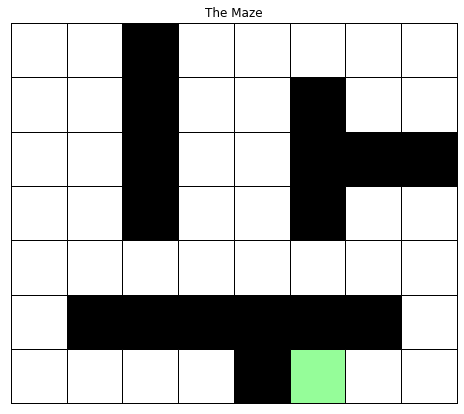

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

In [6]:
print(len(env.states))

2242


In [15]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = (0,0,6,5)
path = env.simulate(start, policy, method)

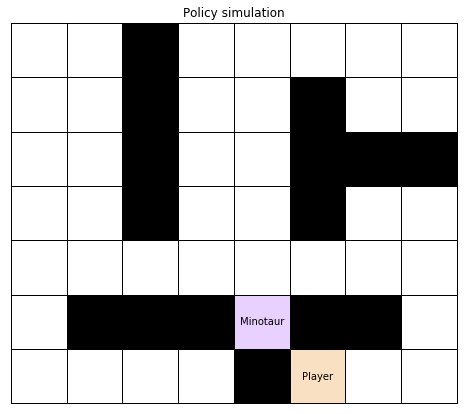

In [16]:
# Show the shortest path 
mz.animate_solution(maze, path)

In [9]:
path

[(0, 6, 6, 5),
 (0, 6, 6, 4),
 (0, 6, 6, 3),
 (0, 6, 6, 2),
 (0, 6, 5, 2),
 (0, 6, 4, 2),
 (0, 6, 4, 1),
 (0, 5, 3, 1),
 (0, 4, 4, 1),
 (1, 4, 4, 0),
 (2, 4, 4, 1),
 (3, 4, 4, 0),
 (4, 4, 3, 0),
 (4, 5, 3, 1),
 (4, 6, 3, 2),
 (4, 7, 2, 2),
 (4, 7, 2, 3),
 (5, 7, 2, 4),
 (6, 7, 2, 3),
 (6, 6, 2, 2),
 (6, 5, 1, 2)]